Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [5]:
import pandas as pd 
data_flight = pd.read_excel("flight_price.xlsx")

In [8]:
data_flight.shape

(10683, 11)

In [12]:
data_flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
## Dataset has 10683 rows and 11 columns

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

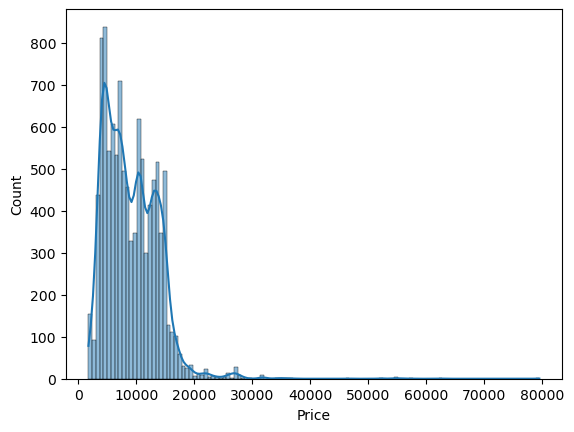

In [13]:
import seaborn as sns

sns.histplot(data=data_flight["Price"],kde=True)

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [14]:
data_flight["Price"].min()

1759

In [15]:
data_flight["Price"].max()

79512

*******************
Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

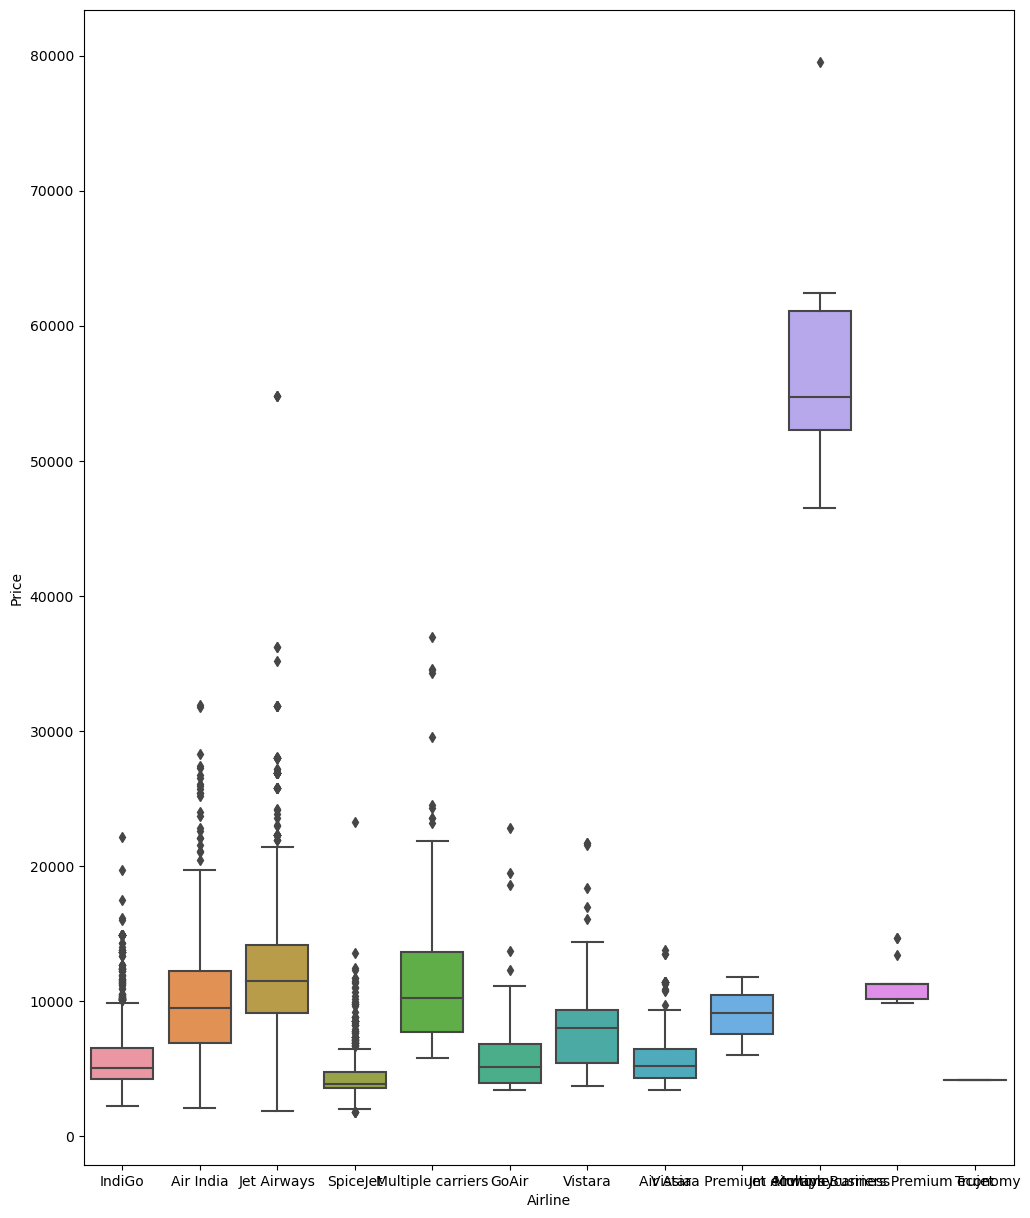

In [20]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 15))

sns.boxplot(data=data_flight[['Airline','Price']],y='Price',x='Airline')

plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

Based on above box plot, there are many outliers for price, majorly on Indogo, Air Indiaand Spicejet.

Outliers can have a significant impact on data analysis and can lead to misleading or erroneous results if not handled properly. The impact of outliers depends on the type of analysis being performed and the underlying statistical methods used. Here are some ways in which outliers can affect data analysis:

Descriptive Statistics: Outliers can distort summary statistics such as the mean and standard deviation. The mean is particularly sensitive to extreme values, pulling it towards the direction of the outliers. This can result in a skewed perception of the central tendency of the data.

Regression Analysis: Outliers can have a substantial effect on regression models. Ordinary Least Squares (OLS) regression, for example, is sensitive to outliers, and a single extreme data point can significantly influence the estimated coefficients and the overall fit of the model.

Clustering and Classification: Outliers can disrupt clustering algorithms by forming their own clusters or altering the boundaries of existing clusters. In classification tasks, outliers can lead to misclassification or adversely affect the performance of the classifier.

Anomaly Detection: Outliers are often associated with anomalies in the data, and they can affect the performance of anomaly detection algorithms. Incorrectly identified outliers may lead to false positives or negatives in anomaly detection systems.

Principal Component Analysis (PCA): Outliers can significantly affect the principal components and alter the directions of variance in the data. As a result, PCA may not effectively capture the main patterns in the data.

Hypothesis Testing: Outliers can violate the assumptions of many statistical tests, such as t-tests and ANOVA, leading to inaccurate p-values and incorrect conclusions.

Machine Learning: Outliers can impact the performance of machine learning algorithms by introducing noise or bias in the training data. Some algorithms may be more robust to outliers than others.


****************
Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?



In [22]:
data_flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [24]:
## We will convert data of journey column to datatime object
df=data_flight

df['doj'] = pd.to_datetime(df['Date_of_Journey'])

# Extract the month and year into separate columns
df['month'] = df['doj'].dt.month
df['year'] = df['doj'].dt.year

/tmp/ipykernel_1109/2086188795.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['doj'] = pd.to_datetime(df['Date_of_Journey'])


we will plot histogram of Month to identify peak travel season.

<AxesSubplot: xlabel='month', ylabel='Count'>

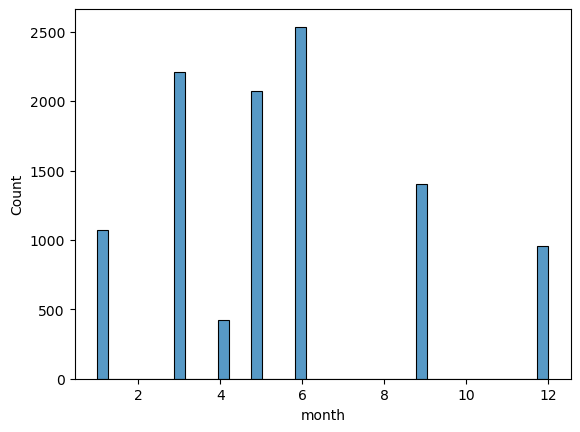

In [29]:
sns.histplot(data=data_flight["month"])

Based on above histogram, we can say that March to June is the peak travel season

************************
Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?



In [30]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'doj', 'month', 'year'],
      dtype='object')

<AxesSubplot: xlabel='month', ylabel='Price'>

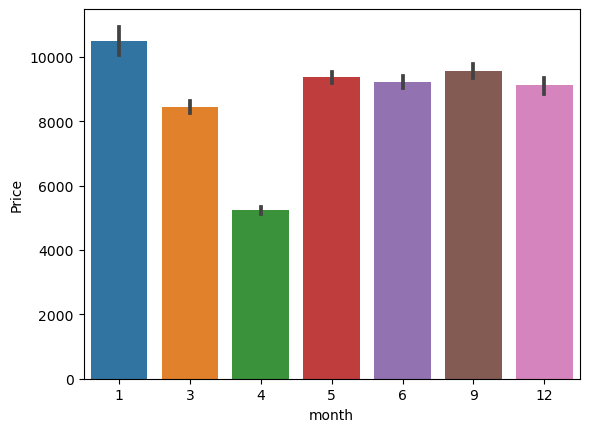

In [36]:
sns.barplot(data=df,x='month',y='Price')

<AxesSubplot: xlabel='Destination', ylabel='Price'>

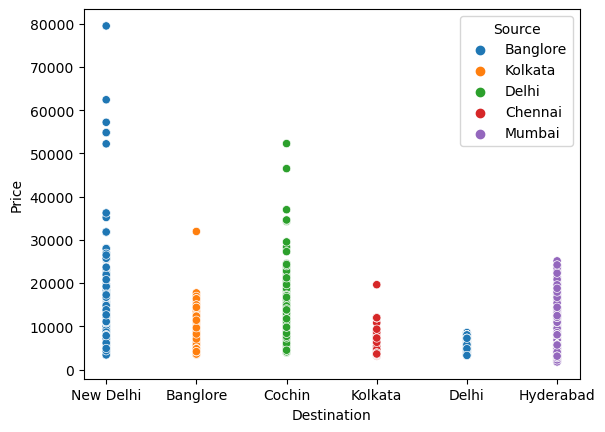

In [39]:
sns.scatterplot(data=df,x='Destination',y='Price',hue='Source')

In [40]:
## Based on above scatter plot, prices are in higher range for Bangalore to New Delhi

<AxesSubplot: xlabel='Total_Stops', ylabel='Price'>

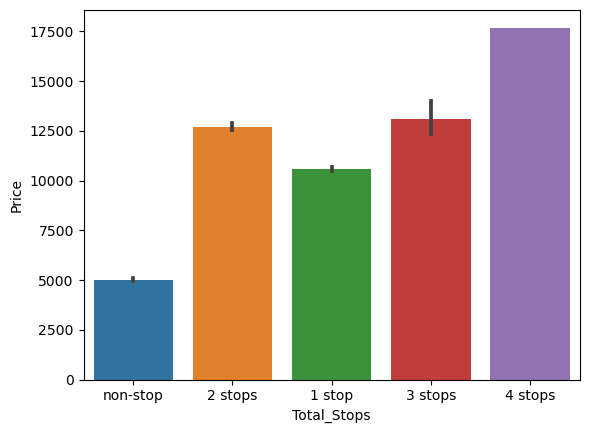

In [43]:
sns.barplot(data=df,x='Total_Stops',y='Price')

In [44]:
## Non stop flights tend to have lower prices

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [45]:
## We will convert time and date features 

In [47]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [49]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'doj', 'month', 'year', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

In [51]:
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  doj              10683 non-null  datetime64[ns]
 12  month            10683 non-null  int64         
 13  year             10683 non-null  int64         
 14  Arrival_hour     10683 non-null  objec

In [59]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'doj', 'month', 'year', 'Arrival_hour',
       'Arrival_min', 'Departure_hour', 'Departure_min'],
      dtype='object')

In [61]:
## Line chart can be plotted for each numerical column against prices

<AxesSubplot: xlabel='Departure_hour', ylabel='Price'>

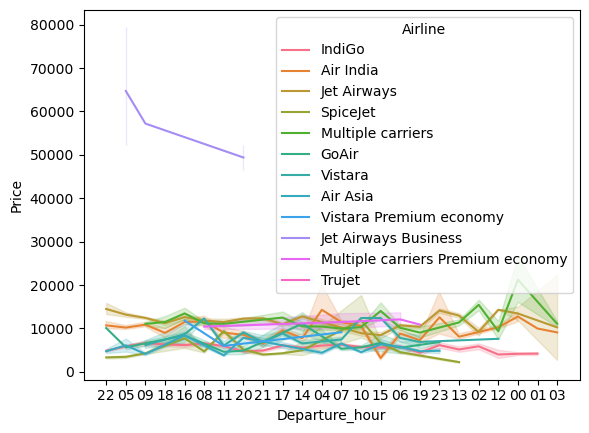

In [64]:
sns.lineplot(data=df,y='Price',x='Departure_hour',hue='Airline')

^^^^^^^^^

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [3]:
import pandas as pd
df_google=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [4]:
fd=df_google

In [6]:
fd.shape

(10841, 13)

In [7]:
## 10841 rows and 13 columns

####################

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [8]:
fd.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [18]:
import seaborn as sns

category = pd.DataFrame(fd['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [28]:
fd['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<AxesSubplot: xlabel='Category', ylabel='Rating'>

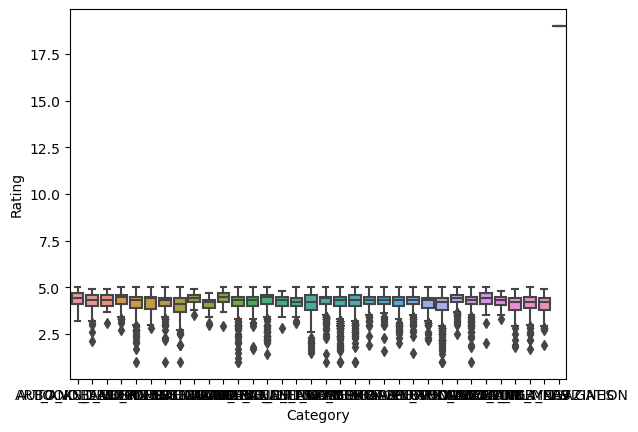

In [33]:
sns.boxplot(data=fd,y='Rating',x='Category')

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [34]:
fd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Rating has most Missing values, Type, Content Rating, Crrent Ver and Android Ver has few missing values.
Rating missing values can make data analysis biased or provide incorrect interpretation

****
Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.



In [ ]:
fd['Size'] = fd['Size'].str.extract('(\d+)').astype(float)

<AxesSubplot: xlabel='Size', ylabel='Rating'>

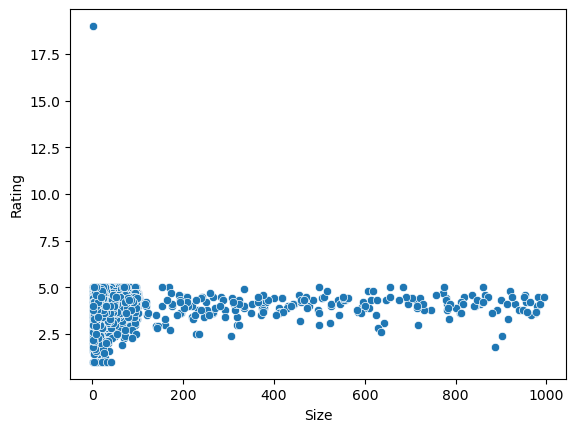

In [52]:

sns.scatterplot(data=fd,x='Size',y='Rating')

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.



In [74]:
fd = fd[fd['Price'] != 'Everyone']

In [75]:
## Remove $ symbol from Price
fd['Price'] = fd['Price'].str.replace('$', '').astype(float)

/tmp/ipykernel_77/1984202778.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fd['Price'] = fd['Price'].str.replace('$', '').astype(float)
/tmp/ipykernel_77/1984202778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Price'] = fd['Price'].str.replace('$', '').astype(float)


<AxesSubplot: xlabel='Type', ylabel='Price'>

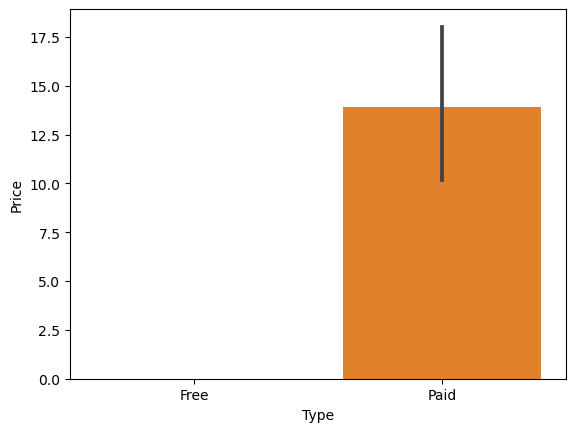

In [76]:
sns.barplot(data=fd,x='Type',y='Price')

***********************
Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [88]:
frequency_table=fd['Installs'].value_counts()

Index(['1,000,000+', '10,000,000+', '100,000+', '10,000+', '1,000+',
       '5,000,000+', '100+', '500,000+', '50,000+', '5,000+', '100,000,000+',
       '10+', '500+', '50,000,000+', '50+', '5+', '500,000,000+', '1+',
       '1,000,000,000+', '0+', '0'],
      dtype='object')

In [91]:
list(frequency_table[:10].index)

['1,000,000+',
 '10,000,000+',
 '100,000+',
 '10,000+',
 '1,000+',
 '5,000,000+',
 '100+',
 '500,000+',
 '50,000+',
 '5,000+']

In [101]:
## Below are top 10 most poular apps

fd[fd['Installs'] == "10,000,000+"][:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20.0,"10,000,000+",Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31.0,"10,000,000+",Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24.0,"10,000,000+",Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16.0,"10,000,000+",Free,0.0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up
117,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715,NaN,"10,000,000+",Free,0.0,Everyone,Beauty,"August 3, 2017",Varies with device,Varies with device
142,Wikipedia,BOOKS_AND_REFERENCE,4.4,577550,NaN,"10,000,000+",Free,0.0,Everyone,Books & Reference,"August 2, 2018",Varies with device,Varies with device
144,Cool Reader,BOOKS_AND_REFERENCE,4.5,246315,NaN,"10,000,000+",Free,0.0,Everyone,Books & Reference,"July 17, 2015",Varies with device,1.5 and up
145,Dictionary - Merriam-Webster,BOOKS_AND_REFERENCE,4.5,454060,NaN,"10,000,000+",Free,0.0,Everyone,Books & Reference,"May 18, 2018",Varies with device,Varies with device
146,NOOK: Read eBooks & Magazines,BOOKS_AND_REFERENCE,4.5,155446,NaN,"10,000,000+",Free,0.0,Teen,Books & Reference,"April 25, 2018",Varies with device,Varies with device


****************************
Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

In [107]:
fd['Installs_count'] = fd['Installs'].str.replace('+', '')
fd['Installs_count'] = fd['Installs_count'].str.replace(',', '').astype(float)

/tmp/ipykernel_77/154080653.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fd['Installs_count'] = fd['Installs'].str.replace('+', '')
/tmp/ipykernel_77/154080653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Installs_count'] = fd['Installs'].str.replace('+', '')
/tmp/ipykernel_77/154080653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [124]:
grouped_sum = fd.groupby('Category')['Installs_count'].sum().reset_index(name='Sum')
sorted_counts = grouped_sum.sort_values(by='Sum', ascending=False)
sorted_counts[0:10]

,Category,Sum
14,GAME,3.508602e+10
6,COMMUNICATION,3.264728e+10
25,PRODUCTIVITY,1.417609e+10
27,SOCIAL,1.406987e+10
29,TOOLS,1.145277e+10
11,FAMILY,1.025826e+10
24,PHOTOGRAPHY,1.008825e+10
21,NEWS_AND_MAGAZINES,7.496318e+09
30,TRAVEL_AND_LOCAL,6.868887e+09
31,VIDEO_PLAYERS,6.222003e+09


**************
Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Playstore dataset, there are several features that you can analyze to make recommendations to the mobile app development company. Here are some key features to consider:

App Ratings and Reviews: Analyzing the average app ratings and the number of reviews can give insights into user satisfaction and app popularity.

Number of Installs: Understanding the distribution of app installs can indicate the reach and popularity of the apps developed by a developer.

App Categories: Analyzing the categories of apps developed can identify which app genres are more successful for a particular developer.

App Size and Updates: Studying the app size and the frequency of updates can reveal how well developers optimize their apps and cater to user feedback.

Revenue and Monetization: If the dataset includes revenue-related information, such as in-app purchases or advertising, it can be valuable to understand the monetization strategies of developers.

User Engagement Metrics: If available, data on user engagement, such as daily active users (DAU) and monthly active users (MAU), can provide insights into the retention and stickiness of the apps.

Developer Portfolio: Examining the overall portfolio of apps developed by a company can provide a comprehensive view of their performance.

Data Visualizations:

To present your findings to the mobile app development company, you can use various data visualizations to make the insights more interpretable and actionable. Some visualizations that can be helpful are:

Bar Charts: Use bar charts to compare the average ratings, number of installs, or revenue generated by different developers.

Pie Charts: Present pie charts to show the distribution of app categories among different developers.

Scatter Plots: Use scatter plots to visualize the relationship between app size, number of reviews, and average ratings.

Line Plots: Create line plots to show the trend in the number of app installs or user engagement over time for each developer.

Heatmaps: Utilize heatmaps to analyze the correlation between app ratings, installs, and other metrics.

Stacked Bar Charts: Present stacked bar charts to compare the proportion of different monetization strategies adopted by various developers.

Treemaps: Use treemaps to visualize the app portfolio of different developers, highlighting the distribution of apps across categories.

Bubble Charts: If available, use bubble charts to show app size (bubbles) and installs (bubble size) for different developers, providing a visual representation of popularity and size optimization.







****************
Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

To identify the best time to launch a new app in the Google Playstore, there are several features that you can analyze to make recommendations to the marketing research firm. Here are some key features to consider:

App Launch Date: Analyzing the historical app launch dates and their corresponding success metrics can provide insights into trends and patterns related to app launches.

App Downloads and Installs: Understanding the distribution of app downloads and installs based on the launch date can indicate the popularity and success of apps launched at different times.

App Ratings and Reviews: Analyzing the average app ratings and the number of reviews in relation to the launch date can provide insights into user satisfaction and early app performance.

App Categories: Studying the categories of successful apps launched at different times can identify which genres tend to perform better during certain periods.

Seasonality and Trends: Analyzing the dataset for any seasonal or cyclical patterns in app downloads and installs can help identify the best time to launch the new app based on user behavior.

Competitor Analysis: Examining the launch dates and performance of competitor apps can help understand how new apps might fare against existing competition.

Data Visualizations:

To present your findings to the marketing research firm, you can use various data visualizations to make the insights more interpretable and actionable. Some visualizations that can be helpful are:

Line Plots: Use line plots to show the trend in app downloads, installs, ratings, or other metrics over time, allowing you to identify any seasonal or temporal patterns.

Bar Charts: Create bar charts to compare the average ratings, number of downloads, or installs for apps launched during different time periods.

Heatmaps: Utilize heatmaps to analyze the distribution of app launches across different months or days of the week, helping to identify the best time for the new app launch.

Scatter Plots: Use scatter plots to visualize the relationship between app launch date and the number of downloads or user reviews.

Box Plots: Present box plots to compare the distribution of app ratings or other metrics for apps launched in different months or quarters.

Stacked Area Charts: Use stacked area charts to show the market share of different app categories based on launch dates.

Time Series Decomposition: Apply time series decomposition techniques to analyze seasonality and trend patterns in app downloads or installs.

Bubble Charts: If available, use bubble charts to show the number of downloads (bubble size) and app ratings (bubble color) for apps launched at different times, providing a visual representation of popularity and user feedback.